## MNIST, Modified National Institute of Standards and Technology
- MNIST 데이터셋은 1980년대 미국 국립 표준 기술 연구소(NIST, National Institute of Standards and Technology)에서 수집.
- 6만개의 훈련 이미지와 1만개의 테스트 이미지로 구성.

- 구성이 완료된 데이터셋을 기반으로 알고리즘의 작동법을 숙지하고 성능을 확인하는 용도로 사용된다.

- keras 패키지에 Nuumpy 배열 형태로 포함되어 있다.


In [1]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images.shape)
print(test_images.shape)
print(train_images.dtype, type(train_images), type(train_labels))

(60000, 28, 28)
(10000, 28, 28)
uint8 <class 'numpy.ndarray'> <class 'numpy.ndarray'>


## MNIST data 구조
- 일반적인 tabula 데이터 (2D)는 각 데이터에 해당하는 행과 그 특성을 나타내는 열로 이루어져 있다.
- MNIST 데이터는 특성부가 다시 2D로 구성되어 있는 3차원 데이터이다.

In [3]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

- 두 개 차원을 이용해 숫자 2를 표현.
	- 행 -> 열 순으로 접근
	- 각 요소는 숫자 ; 숫자로 대상 인식

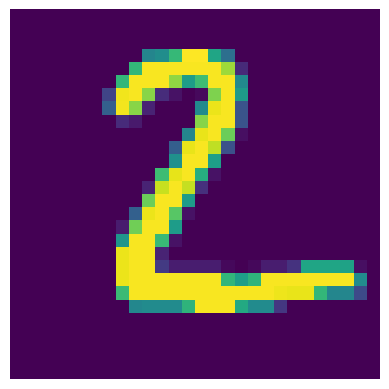

In [4]:
import matplotlib.pyplot as plt
plt.imshow(test_images[1])
plt.axis('off')
plt.show()

## 차원의 `[`차원의 `[`차원`]]`
- 행 차원 28개, 열차원 28개로 숫자 2를 표현한다.
- 이러한 숫자가 train data 에는 6만개, test data에는 1만개가 있다.
- `데이터셋[데이터의 행[데이터의 열]]`
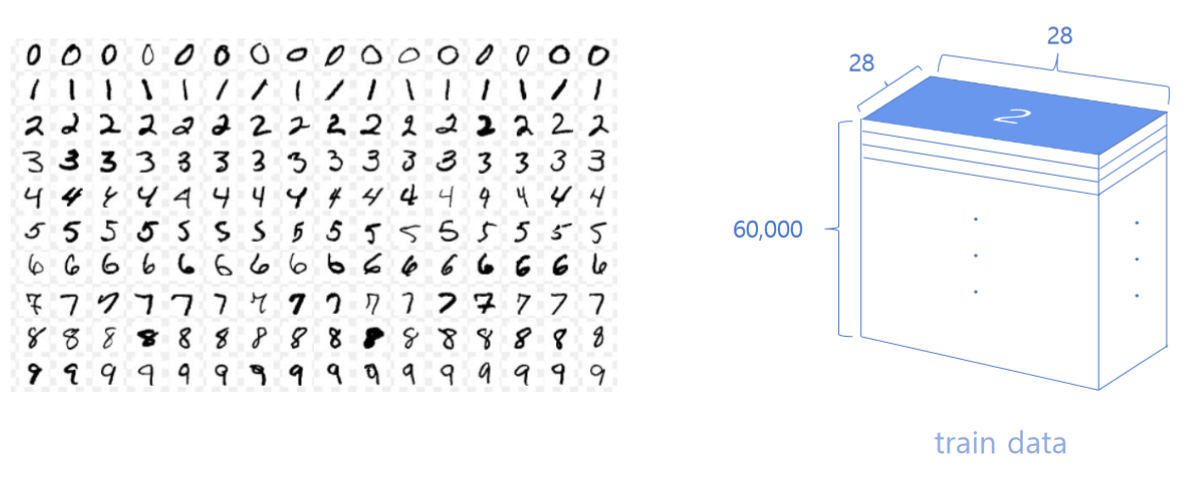

In [5]:
# 특정 구간의 데이터만 선택
my_slice = test_images[0:100]
# my_slice = test_images[0:100,0:28,0:28]
# my_slice = test_images[0:100,:,:]
print(my_slice.shape)
print(my_slice.ndim)

(100, 28, 28)
3


In [6]:
print(set(train_labels), len(train_labels), train_labels.shape)
print(set(test_labels), len(test_labels), test_labels.shape)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 60000 (60000,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} 10000 (10000,)


## Layer 쌓기

In [7]:
from keras import models, layers
model = models.Sequential()

# 은닉층 설정.
model.add(layers.Dense(256, activation='relu', input_shape = (28*28,)))

# 출력층 설정.
model.add(layers.Dense(10, activation='softmax'))

## Compile model

In [17]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics = ['accuracy']
    )

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Loss Function
- 각 분류가 독립적이고 배중적인 경우 이진 분류에서는 binary_crossentropy를, 다중 분류에서는 categorical_crossentropy 함수를 사용한다
- 손실을 계산하는 함수이므로, 예측값이 정답일 때 작은값이 도출되도록 설정한다.
$$BCE = -\frac{1}{N}\sum\limits_{i=1}^{N}y_{i}log\hat{y}_{i}+(1-y_i)log(1-\hat{y}_i)$$
- 정답이 1일 때 예측값이 1이면 log1 == 0, 정답이 0일 때 예측값이 0이면 (1-0) == 1 이므로 log1== 0
$$CCE=-\frac{1}{N}\sum\limits_{i=1}^{N}\sum\limits_{c=1}^{C}y_{i,c}log\hat{y}_{i,c}$$
- 원-핫 인코딩된 정답이 [1, 0, 0]일 때 $𝑖_0$이 1이면 log1 == 0이고, $𝑖_1$, $𝑖_2$는 𝑦𝑖 == 0이므로 전체값은 0

## 데이터 전처리
- 현재 데이터는 (60000,28,28), 각 요소는 0~255의 숫자로 이루어져 있다.
- 이 데이터를 입력층에 맞도록
	- (60000, 28 * 28)의 2차원으로 변환하고,
	- 값이 0~1이 되도록 255로 나누어 준다. (규격화)

- Dense layer는 기본적으로 2D 데이터를 받는다
- 3D 이상의 데이터는 내부적으로 Flatten 하여 2D로 만든다.
	- 그러나 Flatten을 내부적으로 맡겨버리면 (batch_size, input_length, feature_dim)
	  → (batch_size * input_length, feature_dim)로 처리 하므로 원하지 않는 결과가 나올 수 있다

In [9]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28)).astype('float')/255

In [10]:
np.set_printoptions(linewidth=310, suppress=True)
print(test_images[1])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.      

## 종속 변수 원-핫 인코딩

In [11]:
# 중복수행하지 않도록 주의
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

## train

In [19]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2906 - accuracy: 0.9182
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1302 - accuracy: 0.9618
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0885 - accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9802
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9847


- fit 메서드로 모델 훈련.
	- train 데이터와 label, epochs, batch_size를 결정.
	- 메모리 한계와 속도 저하 가능성으로 한 번에 전체 데이터를 학습하지 않을 수 있다. (small batch)
		- 일반적으로 8~512로 설정한다. (기본값 : 32)


## prediction

In [20]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f'test_acc : {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0748 - accuracy: 0.9780
test_acc : 0.9779999852180481


# Tensorflow Data Type

## Tensor
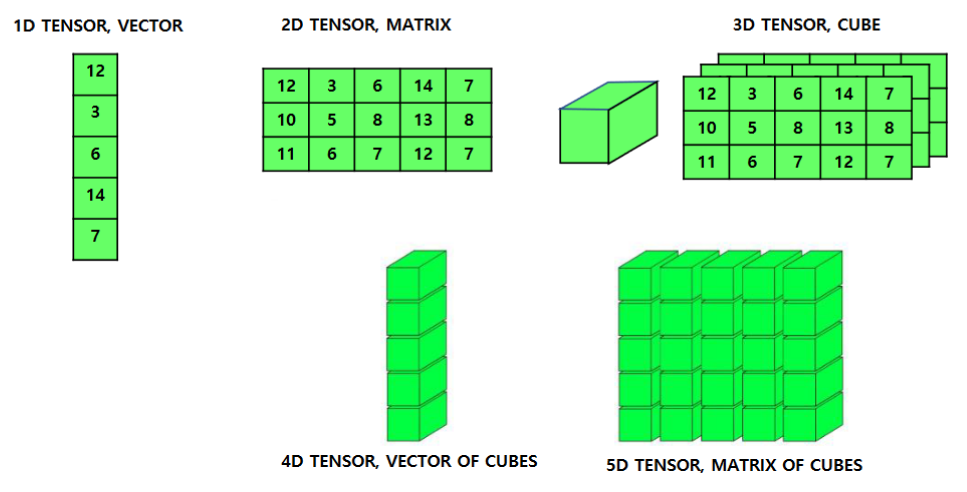

### Scalar

In [21]:
# scala
import tensorflow as tf
x = tf.constant(12)
print(x, x.ndim)


tf.Tensor(12, shape=(), dtype=int32) 0


### Vector

In [23]:
# vector
x = tf.constant([12,3,6,12,7])
print(x, x.ndim)

tf.Tensor([12  3  6 12  7], shape=(5,), dtype=int32) 1


- `tf.constant([12])`와 같이 하나의 숫자만 담아도 축이 있으므로 1차원이다.

### Matrix

In [26]:
x = tf.constant([[12,3,6],[13,2,5],[15,23,12],[12,4,23]])
print(x, x.ndim)

tf.Tensor(
[[12  3  6]
 [13  2  5]
 [15 23 12]
 [12  4 23]], shape=(4, 3), dtype=int32) 2


### 3D & High-Dimensional Tensor

In [27]:
x = tf.constant([[[12,3,6],[13,2,5],[15,23,12],[12,4,23]],
                 [[12,3,6],[13,2,5],[15,23,12],[12,4,23]],
                 [[12,3,6],[13,2,5],[15,23,12],[12,4,23]],])
print(x, x.ndim)

tf.Tensor(
[[[12  3  6]
  [13  2  5]
  [15 23 12]
  [12  4 23]]

 [[12  3  6]
  [13  2  5]
  [15 23 12]
  [12  4 23]]

 [[12  3  6]
  [13  2  5]
  [15 23 12]
  [12  4 23]]], shape=(3, 4, 3), dtype=int32) 3


- DL에서는 4D 텐서까지 만들어 사용한다.
- 동영상 데이터는 5D를 사용하기도 한다.
- 3D 이상의 데이터부터 텐서로 부르기도 한다.

## Tensor to Numpy
- Tensor를 그대로 사용할 수도 있지만, Numpy 배열로 변환하거나 처음부터 Numpy 배열을 텐서처럼 사용하는 경우가 많다. (TF 모델에 numpy 배열을 넣어주면 자동으로 텐서로 처리한다.)


In [28]:
x = np.array([12,3,6,14,7])
print(x, type(x), x.ndim)

[12  3  6 14  7] <class 'numpy.ndarray'> 1


In [29]:
x = tf.constant([12,3,6,14,7])
print(x, type(x), x.ndim)
x_numpy = x.numpy()
print(x_numpy, type(x_numpy), x_numpy.ndim)

tf.Tensor([12  3  6 14  7], shape=(5,), dtype=int32) <class 'tensorflow.python.framework.ops.EagerTensor'> 1
[12  3  6 14  7] <class 'numpy.ndarray'> 1


## 참고
데이터 사이언스에서 차원은 두 가지 의미를 지닌다.
- 개별 컬럼을 차원이라고 하는 경우 ; 각 컬럼을 다른 종류의 정보로 볼 때.
- 층을 차원이라고 부르는 경우 ; 각 층을 다른 종류의 정보로 볼 때.
- 컬럼과 층을 구분하여 말할 때는 
    - 컬럼을 dimension,
    - 층을 axis 혹은 rank 라고 부른다.
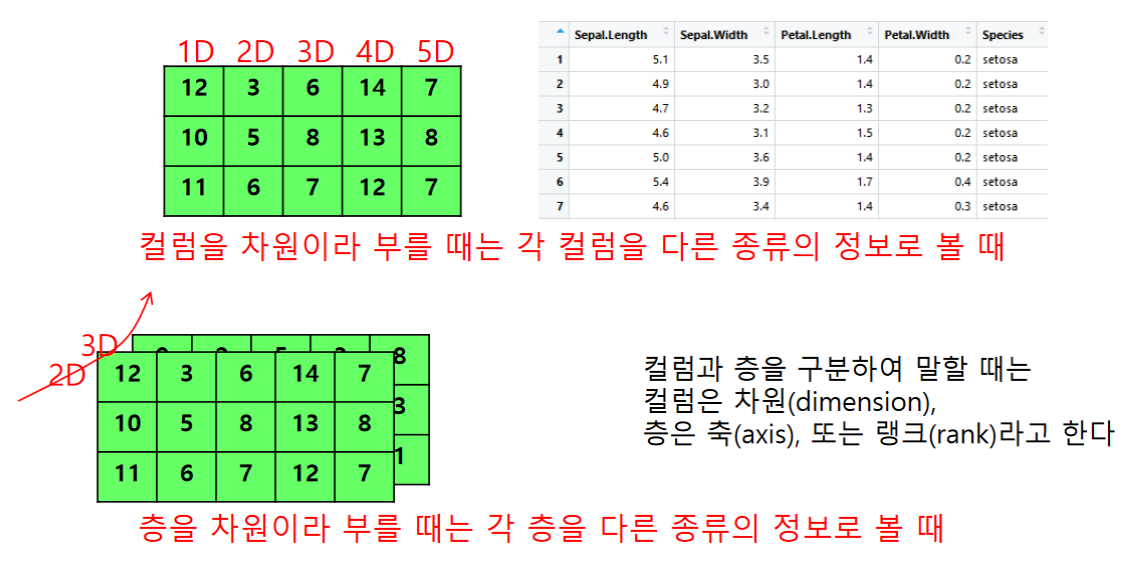